Башмак
![image](data/Video_2024-01-25_14265022.jpg)

Датасет: 147 картинок, различного разрешения, с изображениями тормозных башмаков, в частности их пронумерованной части

In [244]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()

def preprocess(filepath : str):
    src = cv.imread(filepath)
    filtered = cv.medianBlur(src, 7)
    show_image(filtered)
    img_gray = cv.cvtColor(filtered, cv.COLOR_BGR2GRAY)

    ret, thresh = cv.threshold(img_gray, 60, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(src, contours, -1, (0,255,0), 3)
    show_image(src)

    if len(contours) > 0:
        contour = max(contours, key=cv.contourArea)
        x, y, w, h = cv.boundingRect(contour)
        number = src[y:y+h, x:x+w]
    else:
        print('Номер не найден')
        exit()

    # Фонтанное преобразование
    points = []
    for i in range(number.shape[0]):
        for j in range(number.shape[1]):
            if np.any(number[i, j] == 255):
                points.append((j, i))
    points = np.array(points)
    print(points)
    

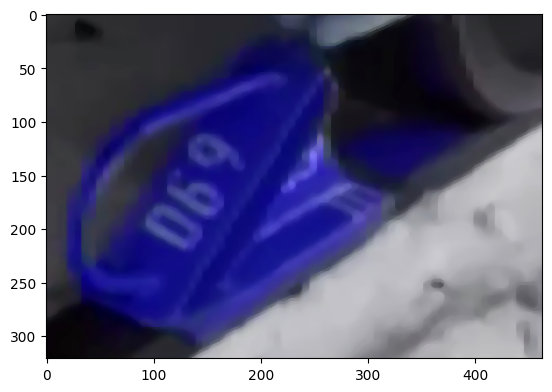

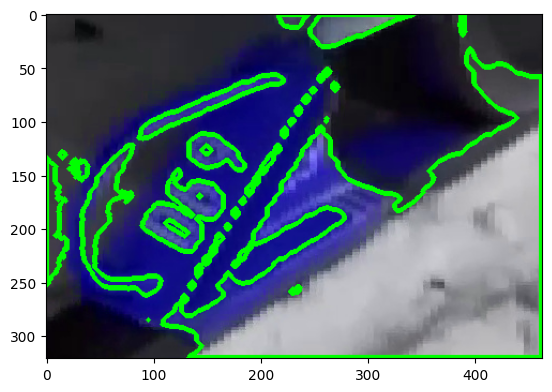

[[149   0]
 [150   0]
 [151   0]
 ...
 [352 288]
 [353 288]
 [354 288]]


In [245]:
import os
import random
data_dir = './data'

files = os.listdir(data_dir)
file = random.choice(files)
path = os.path.join(data_dir, file)
preprocess(path)